In [41]:
# conventional way to import pandas
import pandas as pd
# read CSV file from the 'dataset' subdirectory using a relative path
data = pd.read_csv('dataset/Advertising.csv', index_col=0)

# display the first five rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary objecct types:
    . DataFrame: rows and columns(like a spreadsheet)
    . Series: a single column

In [42]:
# display the last five row
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [43]:
# check the shape of the DataFrame(rows, columns)
data.shape

(200, 4)

What are the features?

    . TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
    . Radio: advertising dollars spent on Radio
    . Newspaper: advertising dollars spent on Newspaper
        
What is the response?

    . Sales: sales of a single product in a given market (in thousands of items)
        
What else do we know?

    . Because the response variable is continuous, this is a regression problem.
    . There are 200 observations (represented by the rows), and each observation is a single market.

      Visualizing data using seaborn

      Seaborn: Python library for statistical data visualization built on top of Matplotlib

In [44]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear withing the notebook
%matplotlib inline

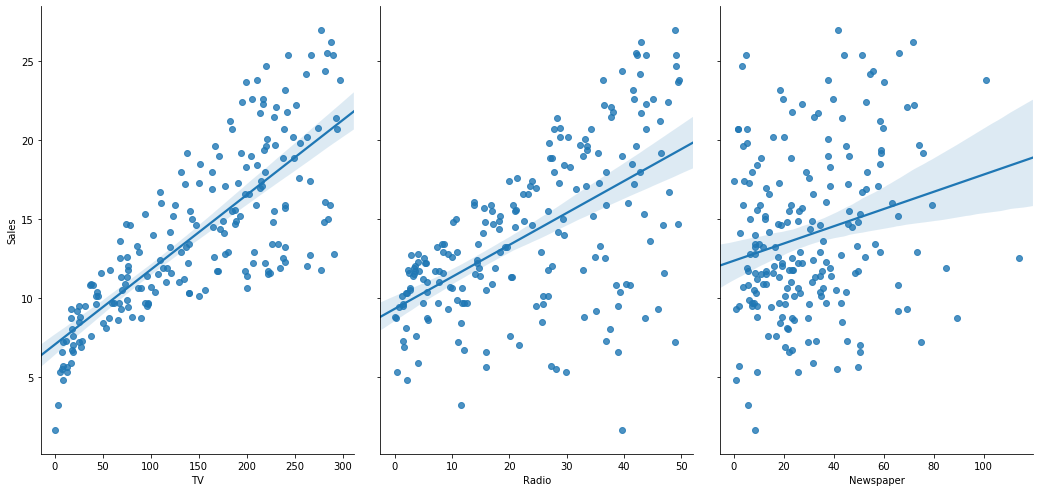

In [45]:
import warnings
warnings.filterwarnings('ignore')
# visulize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

# Linear regression

    . Pros: fast, no tuning required, highly interpretable, well-understood
    . Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)
        
Form of linear regression

   y = β0+β1x1 + β2x2 + · · · + βnxn.
    . y is the response
    . β0 is the intercept
    . β1is the coefficient for  (the first feature)
    . βn is the coefficient for  (the nth feature)
    
In this case:
    y = β0 + β1 × TV  +  β2 × Radio +  β3 × Newspaper
The  values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

 Preparing X and y using pandas
        . scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
        . However, pandas is built on top of NumPy.
        . Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [9]:
# create a Pyhton list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the orginal DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# Print the fitst 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
# check the type  and shape
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [13]:
# select a series from DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# Print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

    Splitting X and y into training and testing sets


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


     Linear regression in scikit-learn


In [16]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

     Interpreting model coefficients


In [17]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

     How do we interpret the TV coefficient (0.0466)?
    
           . For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 
              0.0466 "unit" increase in Sales.
           . Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is 
              associated with an increase in sales of 46.6 items.
                
    Important notes:
            . This is a statement of association, not causation.
            . If an increase in TV ad spending was associated with a decrease in sales,  would be negative.

          Making predictions


In [19]:
# make predications on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values!

Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [23]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

Mean Absolute Error (MAE) is the mean of the absolute value of the errors


In [24]:
# calculate MAE by hand 
print((10 + 0 + 20 + 10)/4)

# calculate MAE using sckit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


Mean Squared Error (MSE) is the mean of the squared errors

In [25]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using sckit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [27]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# calculate RMSE using sckit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics: 
    
    . MAE is the easiest to understand, because it's the average error.
    . MSE is more popular than MAE, because MSE "punishes" larger errors.
    . RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

Computing the RMSE for our Sales predictions

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [29]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to selecct a subset of the orginal DataFrame
X = data[feature_cols]

# select a Series  from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predication on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predications
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

      Cross-validation example: feature selection
Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [33]:
# Again call LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

Check cross validation with two feature (cv=10)

In [34]:
# 10 - fold corss-validation with all two features
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]


In [35]:
# fix the sign of MSE scores
mse_scores =  -scores
print(mse_scores)

[3.38264572 3.28736055 2.09185507 2.81784389 1.27311083 1.74391853
 8.0006111  2.07650936 3.03635301 2.4289835 ]


In [36]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.83919703 1.81310798 1.44632468 1.67864347 1.12832213 1.32057507
 2.82853515 1.44100984 1.74251342 1.55851965]


In [37]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6796748419090766


In [39]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766


In [40]:
# 10-fold cross-validation with three features
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6913531708051792


           Improvements to cross-validation


        Repeated cross-validation

           . Repeat cross-validation multiple times (with different random splits of the data)
             and average the results.
           . More reliable estimate of out-of-sample performance by reducing the variance associated
             with a single trial of cross-validation.
            
        Creating a hold-out set.

            . "Hold out" a portion of the data before beginning the model building process.
            . Locate the best model using cross-validation on the remaining data,
              and test it using the hold-out set.
            . More reliable estimate of out-of-sample performance since hold-out
              set is truly out-of-sample.
            
        Feature engineering and selection within cross-validation iterations

            . Normally, feature engineering and selection occurs before cross-validation.
            . Instead, perform all feature engineering and selection within each 
              cross-validation iteration.
            . More reliable estimate of out-of-sample performance since it better mimics
              the application of the model to out-of-sample data.